In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
# Load the data 
df = pd.read_csv("data.csv")
mycolumn = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth','y']
donne1 = df[mycolumn]
donne1.head()
donne1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     219 non-null    int64
 1   Perseverance            219 non-null    int64
 2   DesireToTakeInitiative  219 non-null    int64
 3   Competitiveness         219 non-null    int64
 4   SelfReliance            219 non-null    int64
 5   StrongNeedToAchieve     219 non-null    int64
 6   SelfConfidence          219 non-null    int64
 7   GoodPhysicalHealth      219 non-null    int64
 8   y                       219 non-null    int64
dtypes: int64(9)
memory usage: 15.5 KB


In [2]:
donne1.shape

(219, 9)

In [3]:

X = donne1.drop('y',axis=1)
y = donne1[['y']]

In [36]:
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)
clf.fit(X_train, y_train)
print(X_test)
print(X_train)
print(y_test)
print(y_train)
X_train.shape
X_test.shape

     Age  Perseverance  DesireToTakeInitiative  Competitiveness  SelfReliance  \
154   18             2                       1                3             1   
93    20             4                       5                5             4   
216   22             3                       4                4             3   
217   19             1                       2                2             3   
15    18             3                       4                3             3   
104   20             5                       4                5             5   
171   18             3                       3                4             4   
208   20             4                       5                4             4   
75    21             4                       4                5             4   
141   20             3                       4                3             5   
97    21             4                       4                4             4   
30    17             3      

(33, 8)

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20)
print(X_valid)
print(y_valid)
X_valid.shape

     Age  Perseverance  DesireToTakeInitiative  Competitiveness  SelfReliance  \
42    26             2                       3                2             3   
69    19             2                       2                3             3   
40    18             3                       4                2             3   
109   20             5                       5                5             5   
108   19             4                       3                5             4   
17    21             4                       3                4             4   
51    20             5                       5                5             4   
8     20             2                       3                3             1   
218   18             3                       5                3             5   
199   19             3                       3                3             3   
194   20             4                       4                4             5   
4     19             2      

(38, 8)

In [38]:
cross_val_score(clf, X_train, y_train, cv=8)

array([0.36842105, 0.52631579, 0.42105263, 0.42105263, 0.66666667,
       0.55555556, 0.33333333, 0.44444444])

In [40]:
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_valid, clf.predict(X_valid)))

0.5526315789473685


In [41]:
clf.feature_importances_

array([0.26666593, 0.10789634, 0.10283624, 0.10747619, 0.12607845,
       0.03173776, 0.16036593, 0.09694316])

In [42]:
def sortSecond(val):
	return val[1]
values = clf.feature_importances_
features = list(X)
importances = [(features[i], values[i]) for i in range(len(features))]
importances.sort(reverse=True, key=sortSecond)
importances

[('Age', 0.26666593390602983),
 ('SelfConfidence', 0.16036592954694223),
 ('SelfReliance', 0.12607845041925667),
 ('Perseverance', 0.10789633940749414),
 ('Competitiveness', 0.10747619047619048),
 ('DesireToTakeInitiative', 0.10283623635780827),
 ('GoodPhysicalHealth', 0.09694315537335858),
 ('StrongNeedToAchieve', 0.03173776451291974)]

In [46]:
X_train = X_train[[col[0] for col in importances[:8]]]
X_valid = X_valid[[col[0] for col in importances[:8]]]
cut_clf = DecisionTreeClassifier()
cut_clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_valid, cut_clf.predict(X_valid)))

0.5263157894736842


0.5526315789473685


In [45]:
params_dist = {
	'criterion': ['gini', 'entropy'],
	'max_depth': randint(low=4, high=40),
	'max_leaf_nodes': randint(low=1000, high=20000),
	'min_samples_leaf': randint(low=20, high=100),
	'min_samples_split': randint(low=40, high=200)
}
clf_tuned = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(clf_tuned, params_dist, cv=7)
random_search.fit(X_train, y_train)
random_search.best_estimator_

DecisionTreeClassifier(max_depth=22, max_leaf_nodes=19849, min_samples_leaf=75,
                       min_samples_split=122, random_state=42)

In [13]:
best_tuned_clf = random_search.best_estimator_
print(metrics.accuracy_score(y_valid, best.predict(X_valid)))

NameError: name 'best' is not defined

In [47]:
print(metrics.classification_report(y_test, cut_clf.predict(X_test[[col[0] for col in importances[:8]]])))
print(metrics.classification_report(y_test, best_tuned_clf.predict(X_test[[col[0] for col in importances[:8]]])))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.42      0.36      0.38        14

    accuracy                           0.52        33
   macro avg       0.49      0.49      0.49        33
weighted avg       0.51      0.52      0.51        33

              precision    recall  f1-score   support

           0       0.58      0.79      0.67        19
           1       0.43      0.21      0.29        14

    accuracy                           0.55        33
   macro avg       0.50      0.50      0.48        33
weighted avg       0.51      0.55      0.51        33



In [48]:
from sklearn.tree import export_text
print(export_text(clf, feature_names=list(X_train)))

|--- Age <= 18.50
|   |--- Perseverance <= 2.50
|   |   |--- class: 1
|   |--- Perseverance >  2.50
|   |   |--- class: 0
|--- Age >  18.50
|   |--- StrongNeedToAchieve <= 4.50
|   |   |--- GoodPhysicalHealth <= 1.50
|   |   |   |--- Age <= 20.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  20.50
|   |   |   |   |--- class: 0
|   |   |--- GoodPhysicalHealth >  1.50
|   |   |   |--- Competitiveness <= 2.50
|   |   |   |   |--- Age <= 19.50
|   |   |   |   |   |--- GoodPhysicalHealth <= 2.50
|   |   |   |   |   |   |--- DesireToTakeInitiative <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DesireToTakeInitiative >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- GoodPhysicalHealth >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  19.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Competitiveness >  2.50
|   |   |   |   |--- SelfConfidence <= 2.50
|   |   |   |   |   |--- Age <= 20.50
|   |   |  

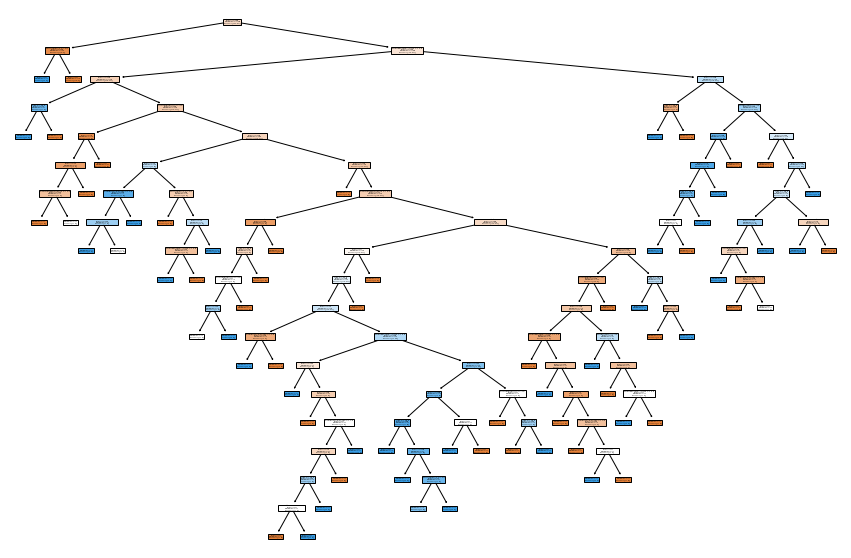

In [49]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, feature_names=list(X_train), filled=True)

In [50]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=list(X_train),  
                                #class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph
graph.render("forest1")

'forest1.jpg'

In [18]:
print(export_text(cut_clf, feature_names=list(X_train)))

|--- GoodPhysicalHealth <= 4.50
|   |--- Age <= 22.50
|   |   |--- Age <= 21.50
|   |   |   |--- SelfReliance <= 2.50
|   |   |   |   |--- SelfConfidence <= 1.50
|   |   |   |   |   |--- StrongNeedToAchieve <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- StrongNeedToAchieve >  1.50
|   |   |   |   |   |   |--- GoodPhysicalHealth <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- GoodPhysicalHealth >  2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- SelfConfidence >  1.50
|   |   |   |   |   |--- Age <= 19.50
|   |   |   |   |   |   |--- DesireToTakeInitiative <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DesireToTakeInitiative >  2.50
|   |   |   |   |   |   |   |--- GoodPhysicalHealth <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- GoodPhysicalHealth >  2.50
|   |   |   |   |   |   |   |   |--- Perseverance <= 2.50
|   |   |   |   |   |   |   | 

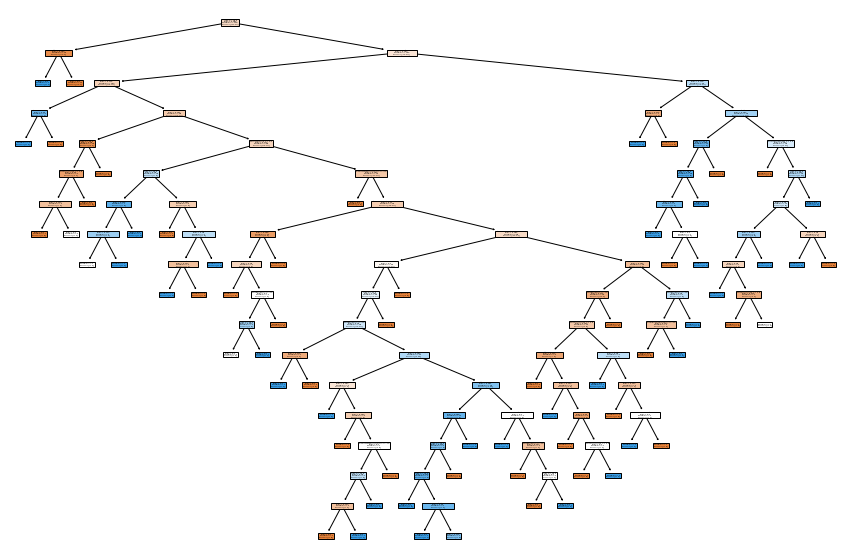

In [51]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(cut_clf, feature_names=list(X_train), filled=True)

In [52]:
dot_data = tree.export_graphviz(cut_clf, out_file=None, 
                                feature_names=list(X_train),  
                                #class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph
graph.render("forest2")

'forest2.jpg'

In [53]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(path)
#print(ccp_alphas)
#print(impurities)

{'ccp_alphas': array([0.        , 0.00056306, 0.00075075, 0.0018018 , 0.00225225,
       0.00337838, 0.0036036 , 0.00405405, 0.00405405, 0.0045045 ,
       0.0045045 , 0.00505051, 0.00525526, 0.00525526, 0.00579151,
       0.00584221, 0.00589681, 0.00608108, 0.00634384, 0.00670313,
       0.00723938, 0.00726351, 0.00761261, 0.00779607, 0.00859406,
       0.00896665, 0.01081081, 0.01082721, 0.01203391, 0.01238739,
       0.01600817, 0.01908148]), 'impurities': array([0.03716216, 0.03828829, 0.03903904, 0.04444444, 0.0466967 ,
       0.05007508, 0.05728228, 0.06133634, 0.0734985 , 0.08250751,
       0.09151652, 0.10161753, 0.12263855, 0.14365957, 0.15524258,
       0.1727692 , 0.178666  , 0.18474708, 0.19109093, 0.20449719,
       0.21173657, 0.2262636 , 0.24910144, 0.3036739 , 0.36383234,
       0.38176563, 0.39257644, 0.42505808, 0.43709199, 0.44947938,
       0.46548755, 0.48456903])}


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dict= {'ccp_alpha':ccp_alphas, 'criterion':['gini', 'entropy']}
grid=GridSearchCV(DecisionTreeClassifier(), param_grid=param_dict, cv=2)
grid.fit(X_train, y_train)
grid.estimator.get_params().keys
#grid.get_params().keys()

<function dict.keys>

In [55]:
grid.best_score_

0.5337837837837838

In [56]:
grid.best_params_

{'ccp_alpha': 0.004054054054054055, 'criterion': 'entropy'}

In [57]:
final_model=DecisionTreeClassifier(ccp_alpha=0.004054054054054055)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004054054054054055)

In [58]:
final_model.score(X_test, y_test)

0.5151515151515151

In [59]:
final_model.tree_.node_count

107

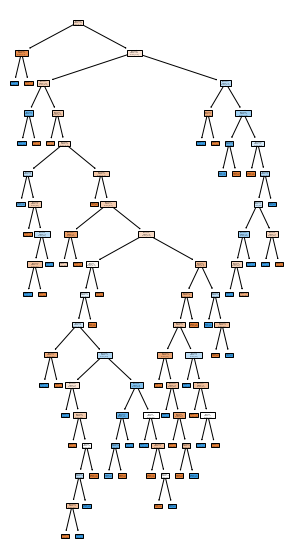

In [60]:
fig = plt.figure(figsize=(5,10))
_ = tree.plot_tree(final_model, 
                   feature_names=list(X_train),  
                   # class_names=target,
                   filled=True)
plt.show()

In [61]:
dot_data = tree.export_graphviz(final_model, out_file=None, 
                                feature_names=list(X_train),  
                                # class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph
graph.render("forest3")

'forest3.jpg'